In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os


# %matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111598b70>]], dtype=object)

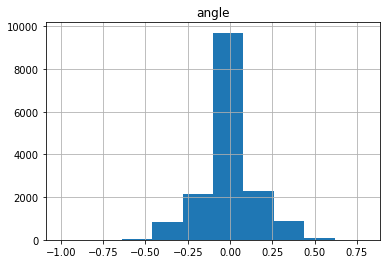

In [81]:
# paths
paths = '/Users/ice/Downloads/data'
pattern = os.path.join(paths, "*/*.csv")

# column names
columns = ('center', 'left', 'right', 'angle', 'throttle', 'break', 'speed')

# list of all csv files
all_files = glob.glob(pattern, recursive=True)

# load one dataframe for each csv
df_from_each_file = (pd.read_csv(f, header=None, names=columns) for f in all_files)

# concatenate the dataframes in one 
df = pd.concat(df_from_each_file, ignore_index=True)

# show histogram for steering angle distribution
df.hist(column='angle', bins=10)

In [54]:
# to get rows between two values
df = df[(df['angle'] >= 0.1) & (df['angle'] <= 0.2)]
df

,center,left,right,angle,throttle,break,speed
399,/home/patrick/Dev/SDCND/Term1/Lesson13 - Behav...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,0.114116,0.877995,0,30.16192
400,/home/patrick/Dev/SDCND/Term1/Lesson13 - Behav...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,0.114116,0.877995,0,30.16058
401,/home/patrick/Dev/SDCND/Term1/Lesson13 - Behav...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,0.114116,0.877995,0,30.15979
402,/home/patrick/Dev/SDCND/Term1/Lesson13 - Behav...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,0.114116,0.877995,0,30.15945
403,/home/patrick/Dev/SDCND/Term1/Lesson13 - Behav...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,0.114116,0.877995,0,30.15928
404,/home/patrick/Dev/SDCND/Term1/Lesson13 - Behav...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,0.114116,0.877995,0,30.15898
405,/home/patrick/Dev/SDCND/Term1/Lesson13 - Behav...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,0.114116,0.877995,0,30.15916
406,/home/patrick/Dev/SDCND/Term1/Lesson13 - Behav...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,0.114116,0.877995,0,30.15910
407,/home/patrick/Dev/SDCND/Term1/Lesson13 - Behav...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,0.114116,0.877995,0,30.15912
408,/home/patrick/Dev/SDCND/Term1/Lesson13 - Behav...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,/home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...,0.161236,0.877995,0,30.15729


In [60]:
max = df.loc[df['angle'].idxmax()]
min = df.loc[df['angle'].idxmin()]
max, min

(center      /home/patrick/Dev/SDCND/Term1/Lesson13 - Behav...
 left         /home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...
 right        /home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...
 angle                                                 0.19976
 throttle                                             0.858284
 break                                                       0
 speed                                                 30.1516
 Name: 4785, dtype: object,
 center      /home/patrick/Dev/SDCND/Term1/Lesson13 - Behav...
 left         /home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...
 right        /home/patrick/Dev/SDCND/Term1/Lesson13 - Beha...
 angle                                                 0.10062
 throttle                                             0.858284
 break                                                       0
 speed                                                  30.154
 Name: 4581, dtype: object)

In [67]:
# other way to find min max
max = df['angle'].max()
min = df['angle'].min()
min, max

(0.10062019999999999, 0.19976029999999997)

In [71]:
import numpy as np

lin = np.linspace(min, max, 10)
lin

array([ 0.1006202 ,  0.11163577,  0.12265133,  0.1336669 ,  0.14468247,
        0.15569803,  0.1667136 ,  0.17772917,  0.18874473,  0.1997603 ])

In [74]:
print( [(a, b) for a, b in zip(lin[::2], lin[1::2])] )

[(0.10062019999999999, 0.11163576666666666), (0.12265133333333332, 0.13366689999999998), (0.14468246666666665, 0.15569803333333332), (0.16671359999999996, 0.17772916666666663), (0.1887447333333333, 0.19976029999999997)]


In [78]:
df_copy = pd.DataFrame(columns=df.columns)
df_copy

,center,left,right,angle,throttle,break,speed
